### BMI kategoriak regionális eloszlása

#### Fontos könyvtárak betöltése

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("BMI_megye.xlsx")

In [5]:
df

,SORSZAM,WEIGHT,KITOLTES_MODJA,TERUL,TEL_NEV,MEGYE_KOD,MEGYE_NEV,REGIO_KOD,REGIO_NEV,HH1_CODED,...,DOH1_b3,GYERMEK_KORCSOP3,GYERMEK_KORCSOP4,GYERMEK_KORCSOP4_KERD,GYERMEK_KORCSOP8,GY_BMI,GY_JARAS,GY_KORL_TEV,Szamitott_BMI,BMI_category
0,6522,2110,2,29531,Vésztő,4,Békés,70,Dél-Alföld,4,...,0.0,1.0,3.0,4,1.0,NaN,-1.0,-1.0,24.034610,3
1,4452,1852,1,24299,Budapest 13. ker.,1,főváros,11,Budapest,4,...,NaN,1.0,1.0,1,1.0,15.717456,1.0,-1.0,36.139456,5
2,11191,3000,2,13426,Kemenesmihályfa,18,Vas,30,Nyugat-Dunántúl,4,...,NaN,1.0,1.0,1,1.0,16.460905,-1.0,1.0,29.000595,4
3,6804,791,2,4446,Tiszakerecseny,15,Szabolcs-Szatmár-Bereg,60,Észak-Alföld,4,...,NaN,1.0,NaN,4,1.0,NaN,-1.0,-1.0,23.120624,3
4,7345,2034,2,24013,Diósd,13,Pest,12,Pest,1,...,NaN,1.0,1.0,1,1.0,NaN,-1.0,-1.0,29.068773,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2856,2251,1,15130,Debrecen,9,Hajdú-Bihar,60,Észak-Alföld,3,...,NaN,NaN,1.0,4,NaN,NaN,-1.0,-1.0,20.061728,3
96,3827,1860,2,33677,Mosonszentmiklós,8,Győr-Moson-Sopron,30,Nyugat-Dunántúl,2,...,NaN,1.0,1.0,1,1.0,NaN,-1.0,1.0,32.421875,5
97,8907,1140,1,17695,Tiszasüly,16,Jász-Nagykun-Szolnok,60,Észak-Alföld,4,...,NaN,1.0,1.0,4,7.0,-2.000000,-1.0,-1.0,22.491349,3
98,6339,2758,1,11396,Pilisszentiván,13,Pest,12,Pest,2,...,NaN,NaN,1.0,4,1.0,NaN,2.0,-1.0,37.182261,5


#### Regionális szintű HDI táblázat betöltése

Forrás: https://hu.wikipedia.org/wiki/Magyarorsz%C3%A1g_r%C3%A9gi%C3%B3i_az_emberi_fejletts%C3%A9gi_index_alapj%C3%A1n

In [22]:
# forrás alapján szerkesztett táblázat
data = pd.read_csv("HDI_2.csv")

In [23]:
data

,Rang,Regio_kod,Régió,2019 HDI,BMI_median_region,BMI_atlag
0,1,12,Közép-Magyarország,0.93,4,29.15
1,2,30,Nyugat-Dunántúl,0.87,4,29.19
2,3,20,Közép-Dunántúl,0.85,5,30.06
3,4,70,Dél-Alföld,0.85,3,23.12
4,5,40,Dél-Dunántúl,0.84,4,25.37
5,6,60,Észak-Alföld,0.83,4,29.67
6,7,50,Észak-Magyarország,0.82,4,28.64


### Regionális szintű elhízás prevalenciája

BMI > 30 elhízás kategória alapján

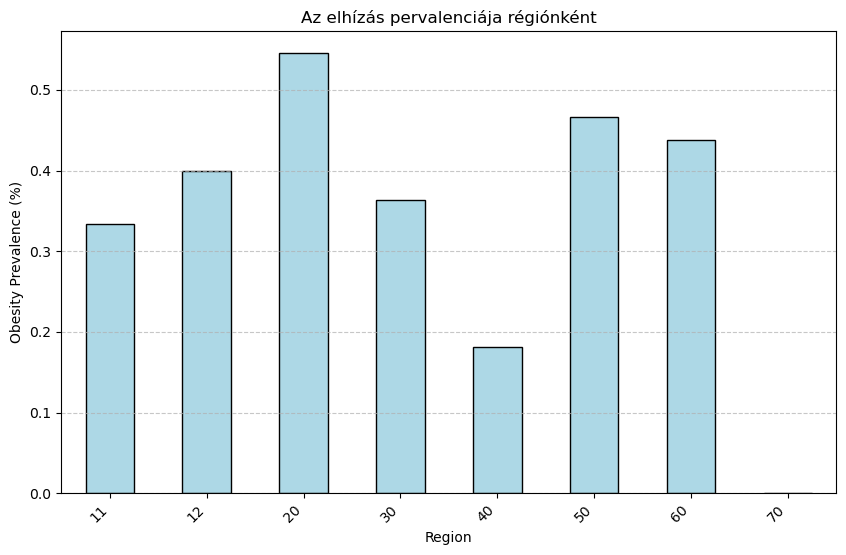

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Elhízás prevalenciájának számítása (BMI > 30 elhízás)
df['obesity_prevalence'] = df['Szamitott_BMI'].apply(lambda x: 1 if x > 30 else 0)

# Regionális szintű elhízás prevalenciája (REGIO alapján)
region_obesity = df.groupby('REGIO_KOD')['obesity_prevalence'].mean()

# Diagram készítése
plt.figure(figsize=(10, 6))
region_obesity.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Az elhízás pervalenciája régiónként')
plt.xlabel('Region')
plt.ylabel('Obesity Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [15]:
# Átlagos BMI és elhízás prevalenciája
region_stats = df.groupby('REGIO_KOD').agg(
    avg_bmi=('Szamitott_BMI', 'mean'),
    obesity_rate=('obesity_prevalence', 'mean')
).reset_index()

print(region_stats)


   REGIO_KOD    avg_bmi  obesity_rate
0         11  27.493076      0.333333
1         12  29.553598      0.400000
2         20  30.063707      0.545455
3         30  29.198436      0.363636
4         40  25.373063      0.181818
5         50  29.225619      0.466667
6         60  29.227670      0.437500
7         70  23.121913      0.000000


#### Területi szintű BMI median meghatározása

In [ ]:
median_per_region2 = df.groupby('TERUL')['BMI_category'].median()

In [ ]:
median_per_region2

#### BMI kategóriák regionális szintű megoszlása

Csoportos histogram

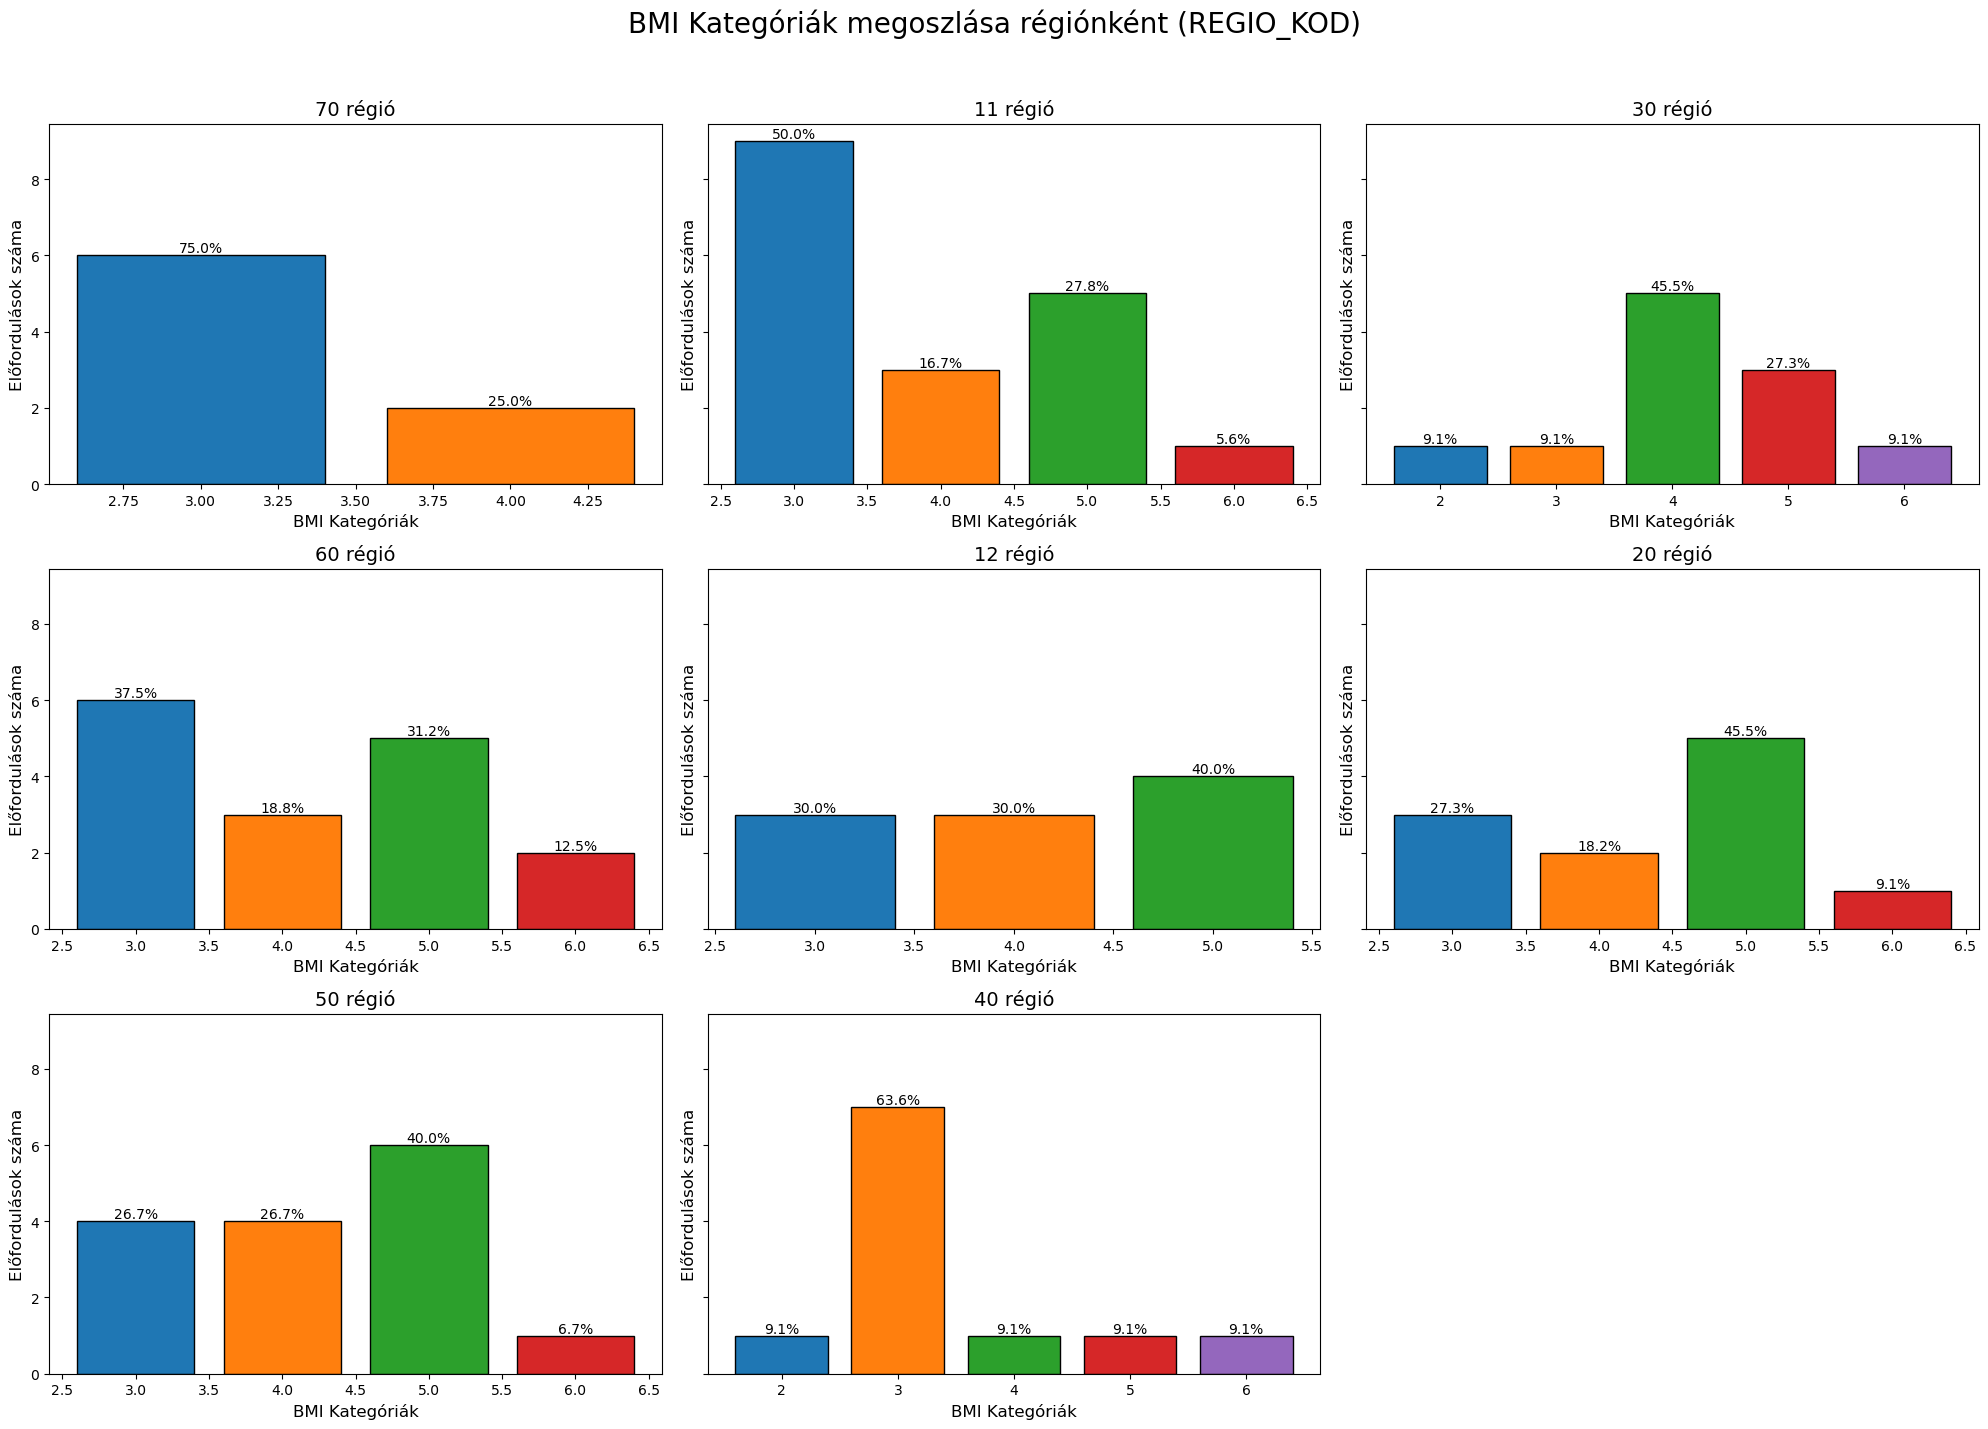

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Egyedi régiók (REGIO_KOD) kiválasztása
terul_categories = df['REGIO_KOD'].unique()
n_regions = len(terul_categories)
ncols = 3  # Maximális oszlopszám egy sorban
nrows = (n_regions + ncols - 1) // ncols  # Szükséges sorszám (kerekítéssel felfelé)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15), sharey=True)

# Színek generálása az oszlopokhoz
color_palette = plt.cm.tab10(np.linspace(0, 1, 10))  # 10 különböző szín

# A diagramok pozíciójának kezelése
for i, terul in enumerate(terul_categories):
    row = i // ncols  # Sor indexe
    col = i % ncols   # Oszlop indexe

    # Szűrés az adott régióhoz tartozó adatokra
    terul_data = df[df['REGIO_KOD'] == terul]
    bmi_counts = terul_data['BMI_category'].value_counts().sort_index()  # BMI6 kategóriák előfordulásainak számítása és rendezése
    total = bmi_counts.sum()  # Összes előfordulás a régióban

    # Oszlopdiagram készítése az adott régióhoz
    ax = axes[row, col]
    bars = ax.bar(
        bmi_counts.index, 
        bmi_counts, 
        color=color_palette[:len(bmi_counts)],  # Minden oszlop más színt kap
        edgecolor='black'
    )
    ax.set_title(f"{terul} régió", fontsize=14)  # Cím nagyítása
    ax.set_xlabel("BMI Kategóriák", fontsize=12)  # X tengely címkéjének nagyítása
    ax.set_ylabel("Előfordulások száma", fontsize=12)  # Y tengely címkéjének nagyítása
    ax.tick_params(axis='x', labelsize=10)  # X tengely értékek nagyítása
    ax.tick_params(axis='y', labelsize=10)  # Y tengely értékek nagyítása

    # Százalékos értékek megjelenítése az oszlopok tetején
    for bar in bars:
        height = bar.get_height()
        percentage = f"{(height / total) * 100:.1f}%"
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            percentage, 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black'
        )

# Az üres helyek eltávolítása, ha a diagramok kevesebb helyet foglalnak el, mint a teljes rács
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])  # Üres tengelyek eltávolítása

# Az elrendezés finomhangolása
plt.suptitle("BMI Kategóriák megoszlása régiónként (REGIO_KOD)", fontsize=20, y=0.95)  # Főcím nagyítása
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Elrendezés finomhangolása
plt.show()